In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import plotly.express as px

In [76]:
design_space = r"C:\Users\z5713258\SVMG_MasterThesis\DesignSpace.csv"
df = pd.read_csv(design_space)

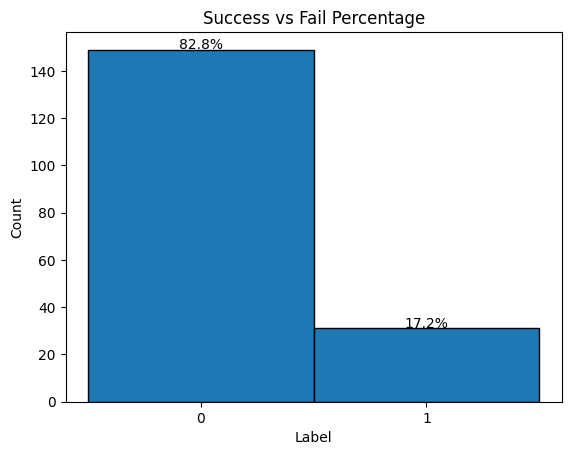

In [43]:
# Calculate counts and percentages
counts = df['DesignLabel'].value_counts()
percentages = counts / counts.sum() * 100

# Plot histogram with bins for 0 and 1
plt.hist(df['DesignLabel'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Success vs Fail Percentage')

# Annotate bars with percentages
for i, pct in zip([0, 1], percentages.sort_index()):
    plt.text(i, counts[i] + 0.2, f'{pct:.1f}%', ha='center', fontsize=10)

plt.show()

# NUS

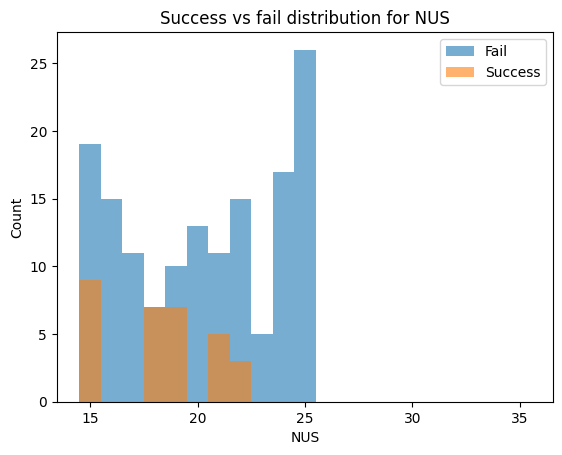

In [45]:
plt.hist(df[df['DesignLabel']==0]['NUS'], bins=[14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5], alpha=0.6, label='Fail')
plt.hist(df[df['DesignLabel']==1]['NUS'], bins=[14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5], alpha=0.6, label='Success')
plt.legend()
plt.xlabel('NUS')
plt.ylabel('Count')
plt.title('Success vs fail distribution for NUS')
plt.show()

# SW

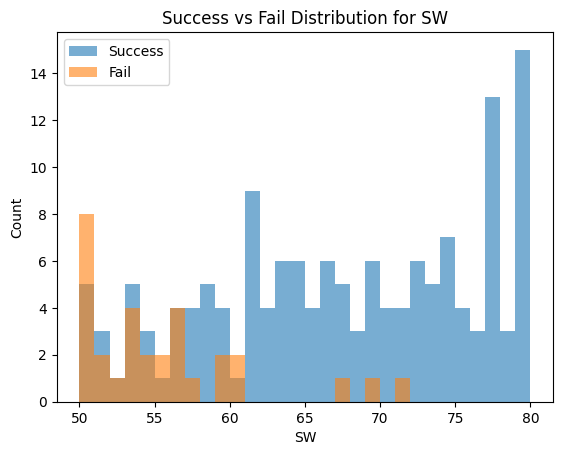

In [48]:
# Define 30 bins between 0.05 and 0.18
bins = np.linspace(50, 80, 31)

# Plot histograms for Label=1 and Label=0 using the specified bins
plt.hist(df[df['DesignLabel'] == 0]['SW'], bins=bins, alpha=0.6, label='Success')
plt.hist(df[df['DesignLabel'] == 1]['SW'], bins=bins, alpha=0.6, label='Fail')

# Add labels and title
plt.legend()
plt.xlabel('SW')
plt.ylabel('Count')
plt.title('Success vs Fail Distribution for SW')

# Show the plot
plt.show()


# ST

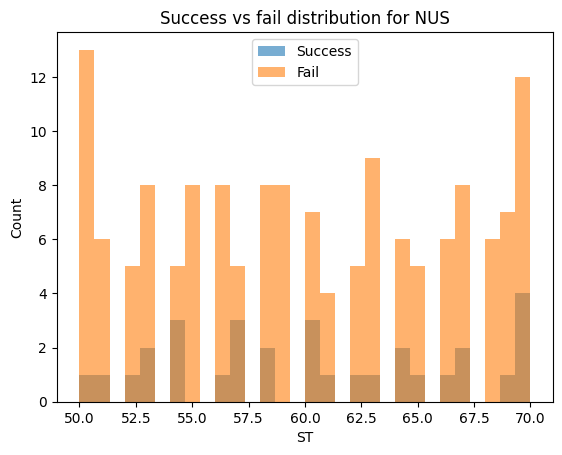

In [51]:
plt.hist(df[df['DesignLabel']==1]['ST'], bins=30, alpha=0.6, label='Success')
plt.hist(df[df['DesignLabel']==0]['ST'], bins=30, alpha=0.6, label='Fail')
plt.legend()
plt.xlabel('ST')
plt.ylabel('Count')
plt.title('Success vs fail distribution for NUS')
plt.show()

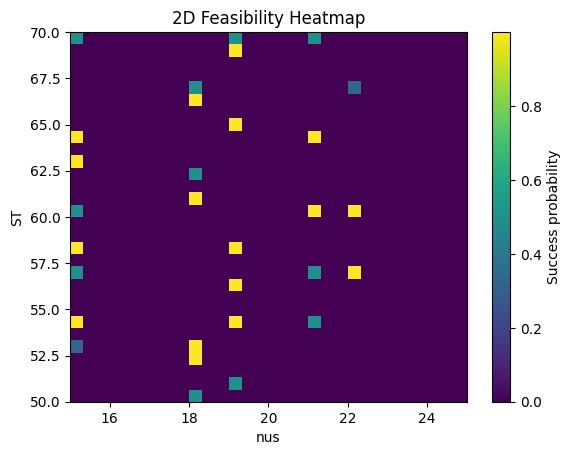

In [52]:
import numpy as np

# Extract variables
x = df['NUS']
y = df['ST']
z = df['DesignLabel']  # 0/1

# Create 2D bins
bins = 30
heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=z)
counts, _, _ = np.histogram2d(x, y, bins=bins)

# Avoid division by zero
prob = heatmap / (counts + 1e-9)

plt.imshow(prob.T, origin='lower', cmap='viridis',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto')
plt.colorbar(label='Success probability')
plt.xlabel('nus')
plt.ylabel('ST')
plt.title('2D Feasibility Heatmap')
plt.show()


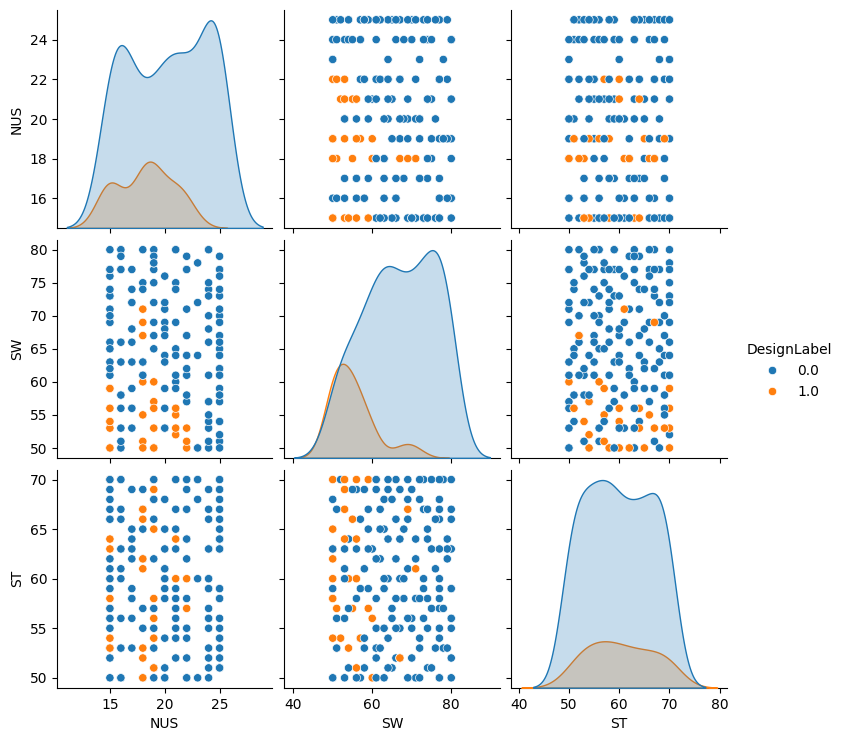

In [ ]:
sns.pairplot(df, hue='DesignLabel', vars=['NUS','SW','ST'])
plt.show()


## Pairwise plots

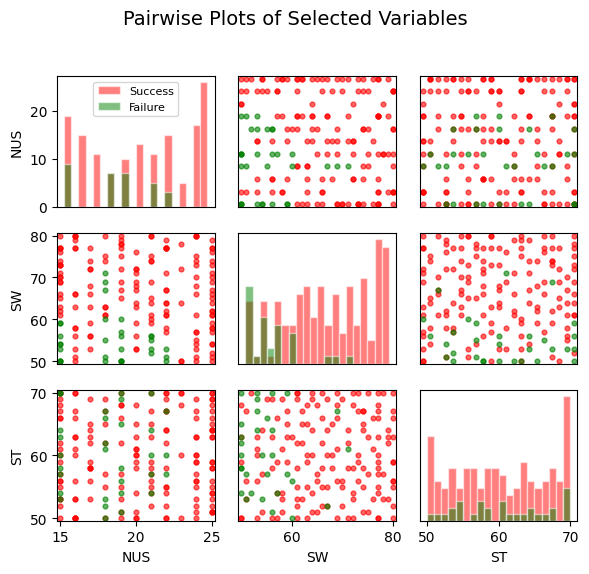

In [79]:

cols_to_plot = ['NUS', 'SW', 'ST']   # only these columns

# --- Load CSV ---

# Ensure required columns exist
required = set(cols_to_plot + ['DesignLabel'])
missing = required - set(df.columns)
if missing:
    raise KeyError(f"Missing columns in CSV: {missing}\nAvailable: {list(df.columns)}")

# Keep only the columns we need (for safety and order)
df = df[cols_to_plot + ['DesignLabel']].copy()

# Coerce to numeric to avoid plotting issues; invalid entries become NaN
for c in cols_to_plot:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Split by label
df0 = df[df['DesignLabel'] == 0]
df1 = df[df['DesignLabel'] == 1]

# Convert to numpy arrays for speed
X0 = df0[cols_to_plot].to_numpy()
X1 = df1[cols_to_plot].to_numpy()

var_names = cols_to_plot
n = len(var_names)

# --- Build pairwise plot ---
fig, axes = plt.subplots(n, n, figsize=(min(2*n, 20), min(2*n, 20)))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]

        if i == j:
            # Diagonal: overlay histograms for Label 0 (red) and Label 1 (blue)
            vals0 = X0[:, i]
            vals1 = X1[:, i]
            vals0 = vals0[~np.isnan(vals0)]
            vals1 = vals1[~np.isnan(vals1)]

            # Use common bins based on combined data for fair comparison
            combined = np.concatenate([vals0, vals1])
            if combined.size == 0:
                bins = 10
            else:
                bins = np.histogram_bin_edges(combined, bins=20)

            ax.hist(vals0, bins=bins, color='red', alpha=0.5, edgecolor='white', label='Success')
            ax.hist(vals1, bins=bins, color='green', alpha=0.5, edgecolor='white', label='Failure')

            # Legend only on diagonal plots (top row to reduce clutter)
            if i == 0:
                ax.legend(fontsize=8)

        else:
            # Off-diagonal: scatter j vs i for both labels
            x0 = X0[:, j]; y0 = X0[:, i]
            x1 = X1[:, j]; y1 = X1[:, i]

            mask0 = ~np.isnan(x0) & ~np.isnan(y0)
            mask1 = ~np.isnan(x1) & ~np.isnan(y1)

            ax.scatter(x0[mask0], y0[mask0], color='red', s=12, alpha=0.6, label='0')
            ax.scatter(x1[mask1], y1[mask1], color='green', s=12, alpha=0.6, label='1')

            # Compute axis limits with small padding using combined valid data
            def pad_limits_arr(a, b):
                a = a[~np.isnan(a)]; b = b[~np.isnan(b)]
                combined = np.concatenate([a, b])
                if combined.size == 0:
                    return (0, 1)
                mn, mx = np.min(combined), np.max(combined)
                pad = 0.02 * (mx - mn if mx > mn else 1.0)
                return (mn - pad, mx + pad)

            ax.set_xlim(*pad_limits_arr(x0, x1))
            ax.set_ylim(*pad_limits_arr(y0, y1))

        # Axis labels only on left column and bottom row
        if j == 0:
            ax.set_ylabel(var_names[i])
        else:
            ax.set_yticks([])

        if i == n - 1:
            ax.set_xlabel(var_names[j])
        else:
            ax.set_xticks([])

fig.suptitle('Pairwise Plots of Selected Variables', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#fig.savefig(output_png, dpi=200, bbox_inches='tight')
#plt.close(fig)

# Final Design space

In [73]:

design_space = r"C:\Users\z5713258\SVMG_MasterThesis\DesignSpace.csv"
df = pd.read_csv(design_space)
# === Choose columns ===
x_col = "NUS"
y_col = "SW"
z_col = "ST"
label = "DesignLabel"  # this is the binary label (1.0 or 0.0)

# --- Ensure columns exist (optional but safer) ---
required_cols = [x_col, y_col, z_col, label]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in CSV: {missing}")

# === Prepare data for plotting ===
# Keep only relevant columns and drop rows with NaNs in these columns
df_plot = df[required_cols].dropna(subset=required_cols)

# Treat label as discrete categories: "0.0" and "1.0"
# (this forces Plotly to use discrete colors instead of a continuous gradient)
df_plot["LabelCat"] = df_plot[label].astype(str)

# Optional: clean up legend labels
label_names = {"0.0": "Failure", "1.0": "Success"}

# Define consistent colors for each category
color_map = {
    "0.0": "#d62728",  # red
    "1.0": "#2ca02c",  # green
}

# === Create interactive 3D scatter ===
fig = px.scatter_3d(
    df_plot,
    x=x_col, y=y_col, z=z_col,
    color="LabelCat",
    opacity=0.8,
    height=700,
    hover_data={label: True, "LabelCat": False},  # show original numeric label in hover
)

# Update marker size
fig.update_traces(marker=dict(size=4))

# Apply discrete color map and nicer legend titles
fig.update_layout(
    title="Interactive 3D Scatter",
    scene=dict(
        xaxis_title=x_col,
        yaxis_title=y_col,
        zaxis_title=z_col,
    ),
    legend_title_text="DesignLabel",
)

# Apply legend names and color map
fig.for_each_trace(
    lambda t: t.update(name=label_names.get(t.name, t.name))
)
fig.update_traces(marker=dict(color=None))  # let color_discrete_map control colors
fig.update_layout(
    coloraxis_showscale=False
)
fig.update_traces(
    marker=dict(line=dict(width=0))
)
fig.update_layout(
    legend=dict(itemsizing="constant")
)

# Plotly Express accepts color_discrete_map via constructor (alternative: rebuild fig)
# Rebuild fig with the discrete map for guaranteed application:
fig = px.scatter_3d(
    df_plot,
    x=x_col, y=y_col, z=z_col,
    color="LabelCat",
    opacity=0.8,
    height=700,
    color_discrete_map=color_map,
    hover_data={label: True, "LabelCat": False},
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(
    title="Interactive 3D Scatter",
    scene=dict(
        xaxis_title=x_col,
        yaxis_title=y_col,
        zaxis_title=z_col,
    ),
    legend_title_text="DesignLabel",
)
fig.for_each_trace(lambda t: t.update(name=label_names.get(t.name, t.name)))

# === Save as a standalone HTML file ===
fig.write_html(r"C:\Users\z5713258\SVMG_MasterThesis\DesignSpace.html", include_plotlyjs="cdn")



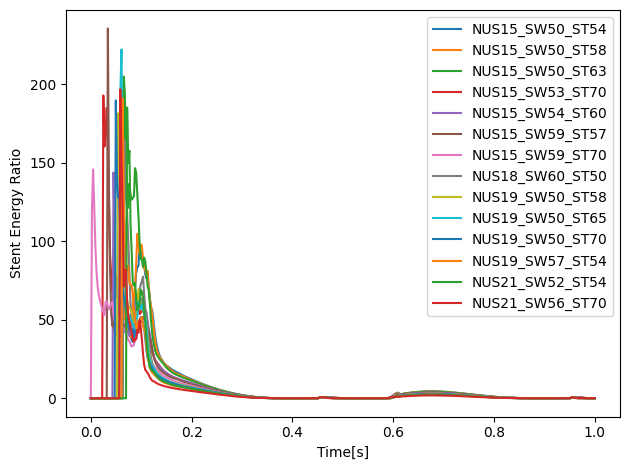

In [74]:
import os
#design_space = r"C:\Users\z5713258\SVMG_MasterThesis\DesignSpace.csv"
#df = pd.read_csv(design_space)
#df = df[df['DesignLabel']==1]
directory_path = r"C:\Users\z5713258\SVMG_MasterThesis\FEA\CylExpansion\Results"
nus_folders = [name for name in os.listdir(directory_path)
               if os.path.isdir(os.path.join(directory_path, name)) and name.startswith("NUS")]

for folder in nus_folders:
    os.chdir(os.path.join(directory_path, folder))
    file_path = os.path.join(directory_path, folder, "StentEnergyRatio.csv")
    if os.path.isfile(file_path):
        df = pd.read_csv("StentEnergyRatio.csv",sep=r"\s+")
        df.columns = df.columns.str.strip()  # remove whitespace in headers

        # Grab first (X) and second (Y) columns by position
        x_raw = df.iloc[:, 0]
        
        # Convert to numeric (coerce bad values to NaN)
        x = pd.to_numeric(x_raw, errors='coerce')
        plt.plot(df['X'],df['StentEnergyRatio'], label=folder)
plt.xlabel('Time[s]')
plt.ylabel('Stent Energy Ratio')

plt.legend()
plt.tight_layout()
plt.show()




In [ ]:

import pandas as pd
import plotly.express as px

# === Load CSV ===
csv_path = r"selected_points.csv"
df = pd.read_csv(csv_path)

# === Choose columns ===
# Replace with your column names:
x_col = "NUS"
y_col = "SW"
z_col = "ST"
color_col = None  # Optional; set to None if not needed

# Filter numeric data and drop NaNs for these columns
cols = [x_col, y_col, z_col] + ([color_col] if color_col else [])
df_plot = df[cols].dropna()

# === Create interactive 3D scatter ===
fig = px.scatter_3d(
    df_plot,
    x=x_col, y=y_col, z=z_col,
    color=color_col if color_col else None,
    opacity=0.8,
    height=700,
)
fig.update_traces(marker=dict(size=4))  # adjust marker size
fig.update_layout(
    title="Interactive 3D Scatter",
    scene=dict(
        xaxis_title=x_col,
        yaxis_title=y_col,
        zaxis_title=z_col,
    ),
    legend_title_text=color_col if color_col else None,
)

# === Show (Jupyter/Notebook) ===
#fig.show()

# === Or save as a standalone HTML file ===
fig.write_html("interactive_3d_scatter_selected_points.html", include_plotlyjs="cdn")
